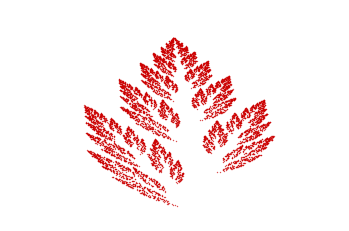

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Question_One:
    def __init__(self, w1, A1, A2, b1, b2):
        #  initialise parameters
        self.w1 = w1
        self.w2 = 1 - w1
        self.A1 = A1
        self.A2 = A2
        self.b1 = b1
        self.b2 = b2
    
    def simulate(self, N):
        # simulate N times
        arr = np.zeros((2, 1))
        f1 = lambda x: self.A1 @ x + self.b1
        f2 = lambda x: self.A2 @ x + self.b2
        fs = [f1, f2]
        
        for i in range(N):
            f = np.random.choice(fs, p=(self.w1, self.w2))
            arr = np.c_[arr, f(arr[:, -1])]
        return arr

    def plot(self, x):
        plt.scatter(x[0,20:], x[1,20:],s=0.1,color=[0.8,0,0])
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.gca().set_xlim(0,1.05)
        plt.gca().set_ylim(0,1)
        plt.savefig("CW 3 Q1.png")
        plt.show()

    def plot_sim(self, N):
        self.plot(self.simulate(N))
        plt.show()
        

w1 = 0.2993
A1 = np.array([[0.4, -0.3733], [0.06, 0.6]])
A2 = np.array([[-0.8, -0.1867], [0.1371, 0.8]])
b1 = np.array([0.3533, 0.0])
b2 = [1.1, 0.1]

Q1 = Question_One(w1, A1, A2, b1, b2)
Q1.plot_sim(10000)


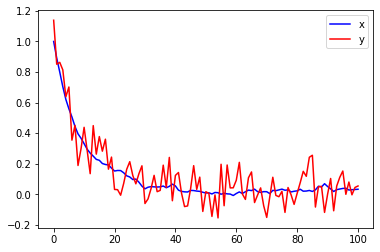

In [47]:
class Question_Two:
    def __init__(self):
        #  initialise parameters

        self.a = 0.9
        self.sdx = 0.01
        self.sdy = 0.1
        self.x0 = 1
    
    def get_x(self, prev_x):
        #  get x_t+1 given x_t

        return np.random.normal(self.a * prev_x, self.sdx)

    def get_y(self, x):
        #  get y_t given x_t

        return np.random.normal(x, self.sdy)

    def simulate(self, T):
        x_arr = [self.x0]
        y_arr = [self.get_y(self.x0)]
        
        for i in range(T):
            x_arr.append(self.get_x(x_arr[-1]))
            y_arr.append(self.get_y(x_arr[-1]))
        
        return x_arr, y_arr
    
    def plot(self, x_arr, y_arr):
        plt.plot(x_arr, color="blue", label="x")
        plt.plot(y_arr, color="red", label="y")
        plt.legend()
        plt.savefig("CW 3 Q2.png")
        plt.show()
    
    def plot_sim(self, T):
        self.plot(*self.simulate(T))
    
    
    

Q2= Question_Two()
Q2.plot_sim(100)

In [22]:
class Question_Three:
    def __init__(self):
        self.x_cur = 1
        self.y_cur = np.random.normal(0, self.x_cur)
        self.t = 1
        self.x_hist = [self.x_cur]
        self.y_hist = [self.y_cur]
    
    def get_y(self):
        return np.random.normal(0, self.x_cur)
            
    def get_x(self):
        pass

    def update_y(self):
        new = self.get_y()
        self.y_cur = new
        self.y_hist.append(new)

    def update_x(self):
        new = self.get_x()
        self.x_cur = new
        self.x_hist.append(new)

    def simulate(self, t, figname):
        for i in range(t):
            self.update_x()
            self.update_y()
            self.t += 1
        
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.plot(self.x_hist)
        ax1.set_title("Standard deviation")
        ax2.plot(self.y_hist)
        ax2.set_title("Return")
        plt.savefig(figname)
        plt.tight_layout()

class Question_Three_v1(Question_Three):
    def __init__(self, sd, a, b):
        super().__init__()
        self.sd = sd
        self.a = a
        self.b = b

    def get_x(self):
        r = np.random.normal(0, self.sd)
        while abs(r) > 1:
            r = np.random.normal(0, self.sd)
        
        return self.x_cur * (1 + r) * self.a + self.b
Q3_v1 = Question_Three_v1(0.1, 0.99, 0.01)
Q3_v1.simulate(500, "CW3 Q3 plots2")

Q3_v1 = Question_Three_v1(0.2, 0.995, 0.005)
Q3_v1.simulate(500, "CW3 Q3 plots3 v2")

class Question_Three_Decay(Question_Three):
    def get_x(self):
        return 1 / (1 + self.t / 100)
Q3_const = Question_Three_Decay()
Q3_const.simulate(500, "CW3 Q3 decay")

class Question_Three_Growth(Question_Three):
    def get_x(self):
        return 1 + 10 * self.t**2  / 500 ** 2

Q3_const = Question_Three_Growth()
Q3_const.simulate(500, "CW3 Q3 growth")